<a href="https://colab.research.google.com/github/Akshaymahajan2111/Python/blob/main/News_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
data = pd.read_csv("NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [4]:
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


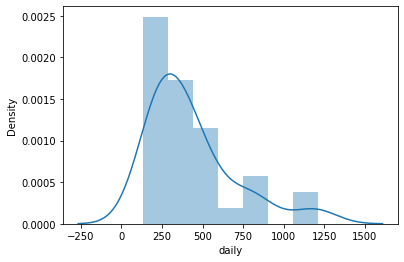

In [5]:
import seaborn as sns
sns.distplot(data['daily'])

In [6]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = data).fit()

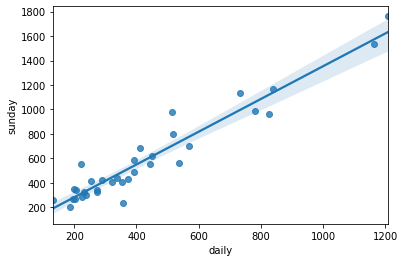

In [7]:
sns.regplot(x="daily", y="sunday", data=data);

In [8]:
#Coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [9]:
#t and p-values
print(model.tvalues, '\n', model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [10]:
#R squared values
(model.rsquared, model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

In [11]:
#presict for 200 and 300 daily circulation
newdata=pd.Series([200,300])

In [12]:
data_pres=pd.DataFrame(newdata,columns=["daily"])

In [13]:
model.predict(data_pres)

0    281.778581
1    415.750057
dtype: float64